In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
training_set = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(28, 28),
        color_mode="grayscale",
        batch_size=128,
        class_mode='categorical')

testing_set = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(28, 28),
        color_mode="grayscale",
        batch_size=128,
        class_mode='categorical')

Found 88000 images belonging to 11 classes.
Found 22000 images belonging to 11 classes.


In [4]:
model = Sequential()
# conv layer 1
model.add(Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        activation = "relu",
                        input_shape = (28,28,1)))
# conv layer 2
model.add(Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        activation = "relu"))
# pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))
# deactivating some elements
model.add(Dropout(.20))
# conv layer 3
model.add(Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        activation = "relu"))
                        
# conv layer 4
model.add(Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        activation = "relu"))
                       
# pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
# deactivating some elements
model.add(Dropout(.1))
# flatten layer
model.add(Flatten())
# fully connected layer
model.add(Dense(256, activation="relu"))
# output layer
model.add(Dense(units=11, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,219 (1.26 MB)

 Trainable params: 330,219 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

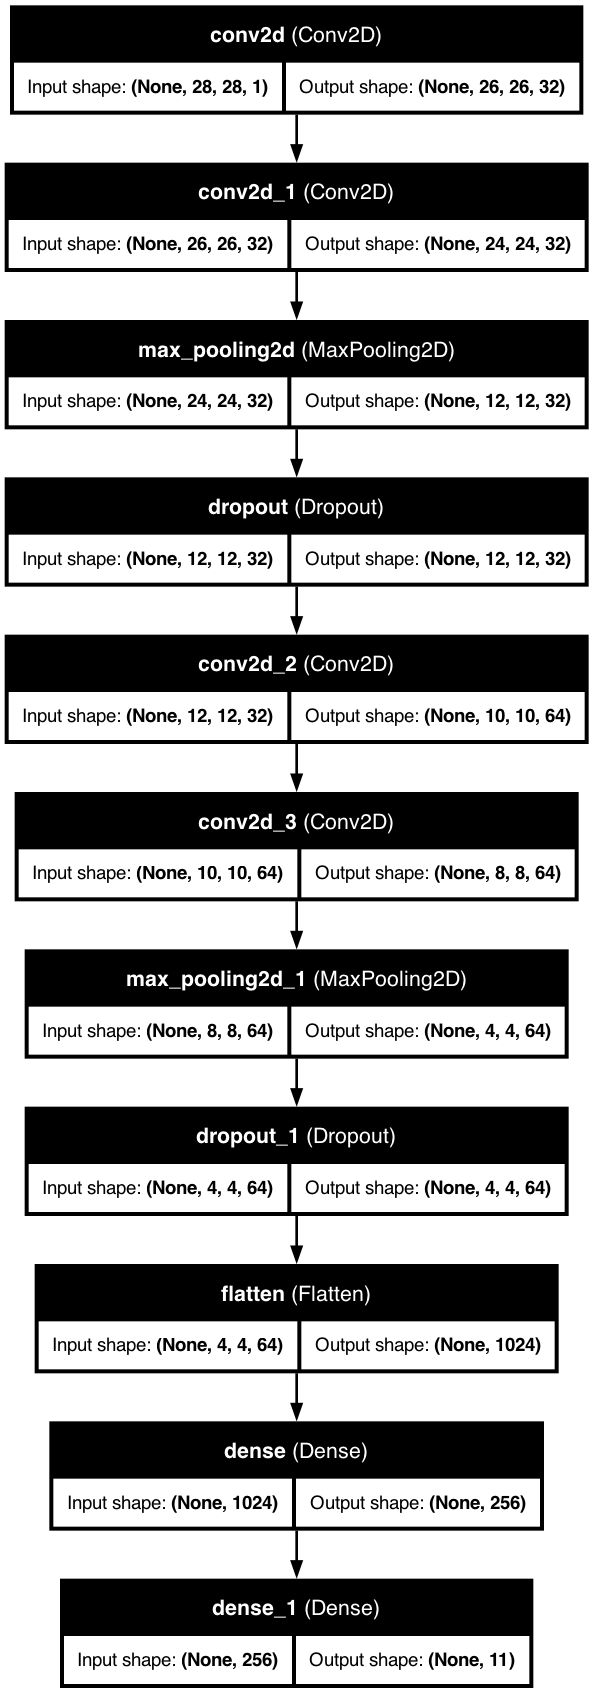

In [6]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96
)

In [8]:
history = model.fit(
        training_set,
        steps_per_epoch=88000 // 128,  # Number of training samples // batch_size
        epochs=10,
        validation_data=testing_set,
        validation_steps=22000 // 128)   # Number of test samples // batch_size

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.3983 - loss: 1.7466 - val_accuracy: 0.7988 - val_loss: 0.6493
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6562 - loss: 1.0125 - val_accuracy: 0.7931 - val_loss: 0.6657
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.7075 - loss: 0.9005 - val_accuracy: 0.8392 - val_loss: 0.5177
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7422 - loss: 0.8321 - val_accuracy: 0.8379 - val_loss: 0.5244
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.7654 - loss: 0.7396 - val_accuracy: 0.8715 - val_loss: 0.4334
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7734 - loss: 0.8353 - val_accuracy: 0.8718 - val_loss: 0.4348
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.7887 - loss: 0.6624 - val_accuracy: 0.8718 - val_loss: 0.4251
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8438 - loss: 0.4850 - val_accu

In [9]:
model.predict(testing_set)

172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


array([[6.5740213e-02, 3.2295648e-07, 8.8216704e-01, ..., 3.0263215e-03,
        1.4391665e-03, 4.4765454e-04],
       [5.0423919e-06, 8.8979193e-04, 3.1310552e-05, ..., 8.6134270e-07,
        2.2158318e-05, 8.4376303e-08],
       [2.0646041e-07, 2.6676261e-07, 1.3283190e-04, ..., 7.4697360e-05,
        9.9959177e-01, 6.3420157e-07],
       ...,
       [9.9285781e-01, 1.8641475e-07, 3.3032792e-04, ..., 6.7695620e-04,
        3.3060836e-08, 2.1135807e-03],
       [8.4588239e-09, 5.6891682e-08, 2.6557160e-07, ..., 5.1405447e-10,
        3.5284481e-06, 1.2042274e-10],
       [2.3499680e-09, 3.2843211e-10, 7.5317648e-06, ..., 5.9399536e-05,
        4.6975251e-10, 1.0091859e-11]], dtype=float32)

In [10]:
model.save("model_cnn.h5")